# Сборный проект

Целью проекта является анализ продаж интернет-магазина "Стримчик" копьютерных игр. Необходимо выявить определяющие успешности игр для дальнйшего планирования рекламной компании

In [17]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import sys

import getopt
from datetime import datetime

import pandas as pd
import psycopg2

from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 


query = ''' SELECT * 
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

dash_visits.to_csv('dash_visits.csv', index=False)

In [18]:
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

# 1. Изучение данных и общей информации

In [19]:
games = pd.read_csv('/datasets/games.csv')
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На остновании первичного анализа - необходимо привести заголовки столбцов к нижнему регистру, преобразовать данные в нужные типы, также провести работу с пропусками

In [13]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,"16,446.00","2,006.48",5.88,"1,980.00","2,003.00","2,007.00","2,010.00","2,016.00"
NA_sales,"16,715.00",0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,"16,715.00",0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,"16,715.00",0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,"16,715.00",0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,"8,137.00",68.97,13.94,13.00,60.00,71.00,79.00,98.00


# 2. Подготовка данных

Приведем наименование столбцов к нижнему регистру

In [14]:
games.columns = games.columns.str.lower()

Проверим результат

In [15]:
games.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

Из информации о файле с данными видим, что необходимо преобразовать тип данных в стобцах "Year_of_Release" и "User_Score"

In [16]:
games.drop(games[games['year_of_release'].isnull()].index, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Так же удалили строки где имелись пропуски в столбце "year_of_release", т.к. их небольшое количество, и потеря этих данных не привед к икажению картины

In [17]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

TBD служит для отметки неясностей или пропусков, которые надо заполнить.

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Обработка пропусков

In [20]:
print(games.isna().mean())

name              0.00
platform          0.00
year_of_release   0.00
genre             0.00
na_sales          0.00
eu_sales          0.00
jp_sales          0.00
other_sales       0.00
critic_score      0.51
user_score        0.55
rating            0.41
dtype: float64


Видим, что пропуски остались в столбцах "critic_score", "user_score" и "rating". В столбцах с оценкой заменять пропуски (например средней величиной) считаю не коррктно, все таки это субъективное мнение, поэтому оставим их. А вот пропуски в колонке рейтинг заполним фразой "no rating", возможно каким то играм рейтинг не присваивается, например для данных игр не возрастных ограничений

In [21]:
games['rating'] = games['rating'].fillna('no rating')
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating


Посчитаем суммарные продажи по всем регионам

In [22]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating,28.31


# 3. Исследовательский анализ данных

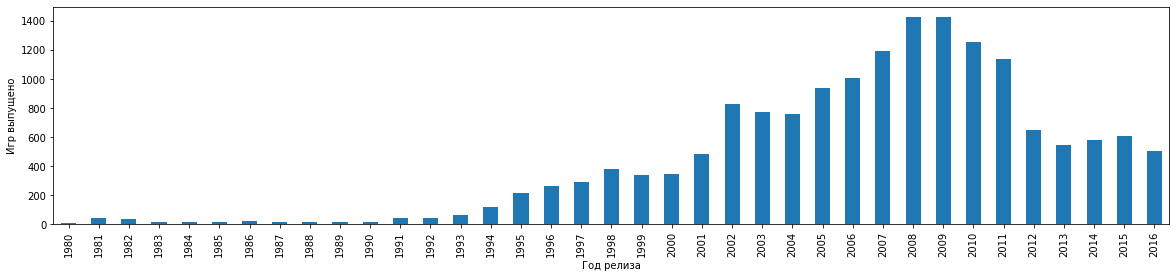

In [23]:
games.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(20,4))
sb.set()
sb.set_palette('Set2')
plt.ylabel('Игр выпущено')
plt.xlabel('Год релиза')
plt.show()

На основании задания для исследования необходимо спрогнозировать 2017 год, поэтому скорее всего не целесообразно брать для анализа информацию за все представленные года. Как видно из графика можно взять информацию за последние пять лет 2012-2016, тем более количество выпущенных игр в эти годы имеют незначительное колебание.

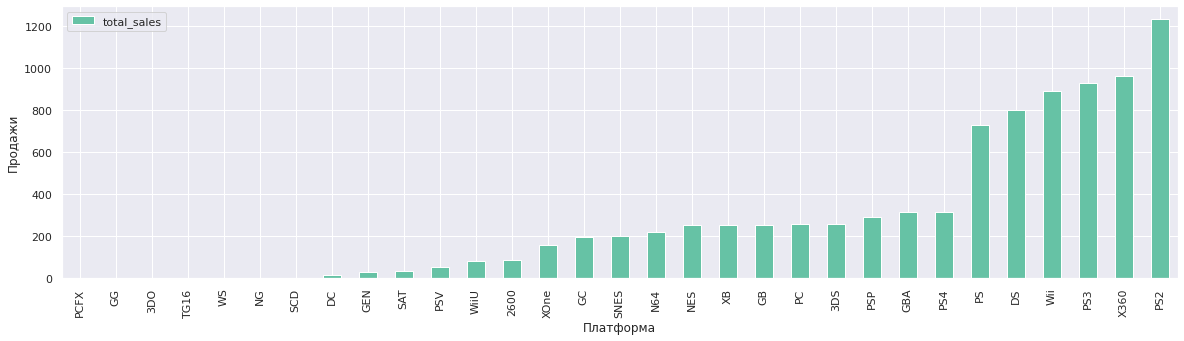

In [24]:
platform_pivot = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales'))
platform_pivot.plot(kind='bar', figsize=(20,5))
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()

На основе анализа графика можно отметить платформы с наибольшим количеством продаж, к ним относятся PS, DS, Wii, PS3, X360, PS2

In [25]:
platforms = platform_pivot.sort_values(by='total_sales', ascending=False)[0:6].index
games_platforms = games.query('platform in @platforms')
games_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no rating,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01


Используем функцию для распределения по годам

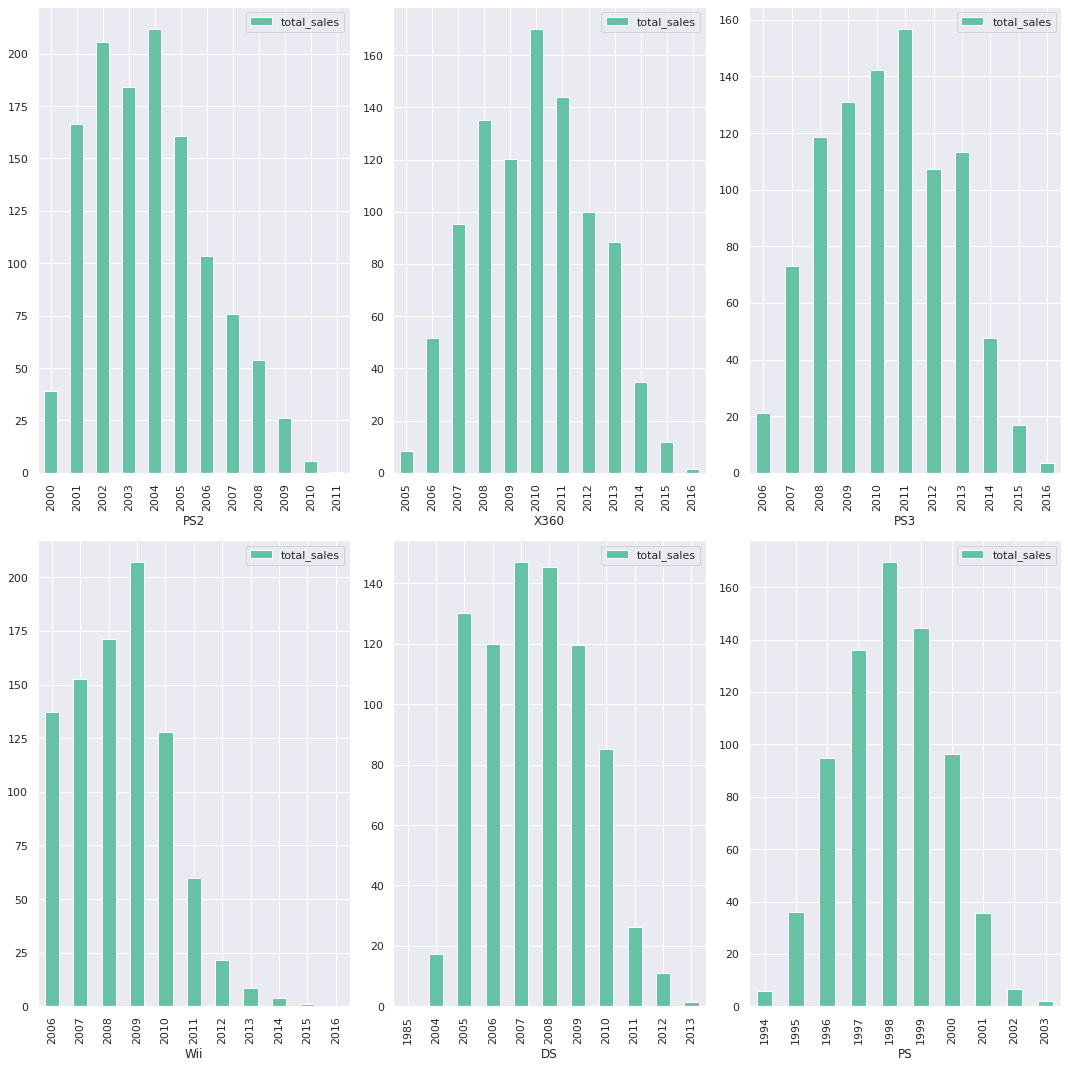

In [26]:
def platform_sales(data, my_list,n,m, ysize):
    temp = data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    plt.subplots(n,m,figsize=(15,ysize))
    i = 1
    for platform in my_list:
        ax = plt.subplot(n,m,i)
        l = list(temp.query('platform==@platform').index.get_level_values(1))
        temp.query('platform==@platform').plot(kind='bar', ax=ax, label=platform)
        plt.legend()
        plt.xlabel(platform)
        i+=1
        ax.set_xticklabels(l)
    plt.tight_layout()
platform_sales(games_platforms, platforms,2,3, 15)

Из графиков можно сделать вывод, аномально себя проявила платформа Wii, она после появления резко стала популяной, а затем ее популярность так же резко снизилась. Остальные платформы ведут себя более предсказуемо, после входа они набирают популярность и достигнув своего пика, популярность их снижается. Такой цикл длится примерно в течении десяти лет.

Выделим данные за актуальный период 2012-2016 в отдельную таблицу

In [27]:
games_period = games.query('2012 <= year_of_release <= 2016')
games_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4    314.14
PS3    288.79
X360   236.54
3DS    194.61
XOne   159.32
WiiU    82.19
PC      62.65
PSV     49.18
Wii     35.37
DS      12.55
PSP     11.19
Name: total_sales, dtype: float64

Выберем из спика пять наиболее прибыльных платформ

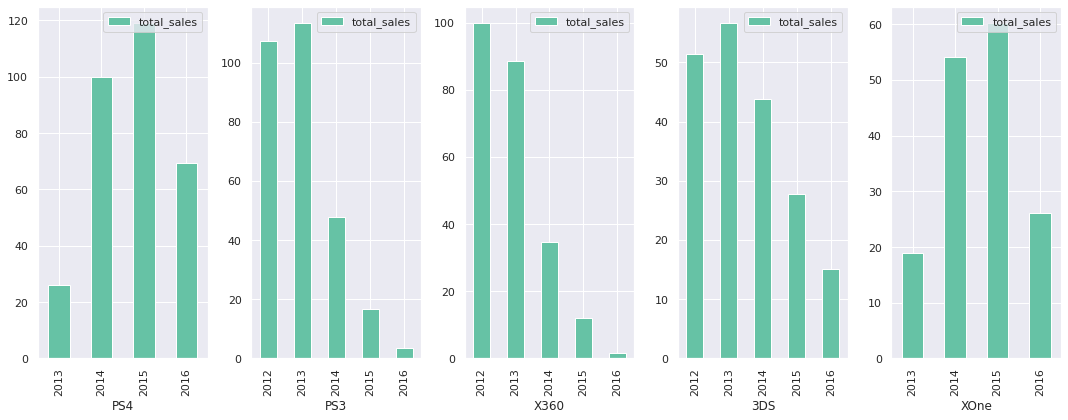

In [28]:
top_platforms = games_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[0:5]
games_top5_platforms = games_period.query('platform in @top_platforms')
platform_sales(games_top5_platforms, top_platforms, 1, 5, 6)

Как видно из графиков для интерисуещего нас периода 2017 года, актуальными по прибыльности могут оставаться только PS4, 3DS и XOne

Проанализируем самые продаваемые игры

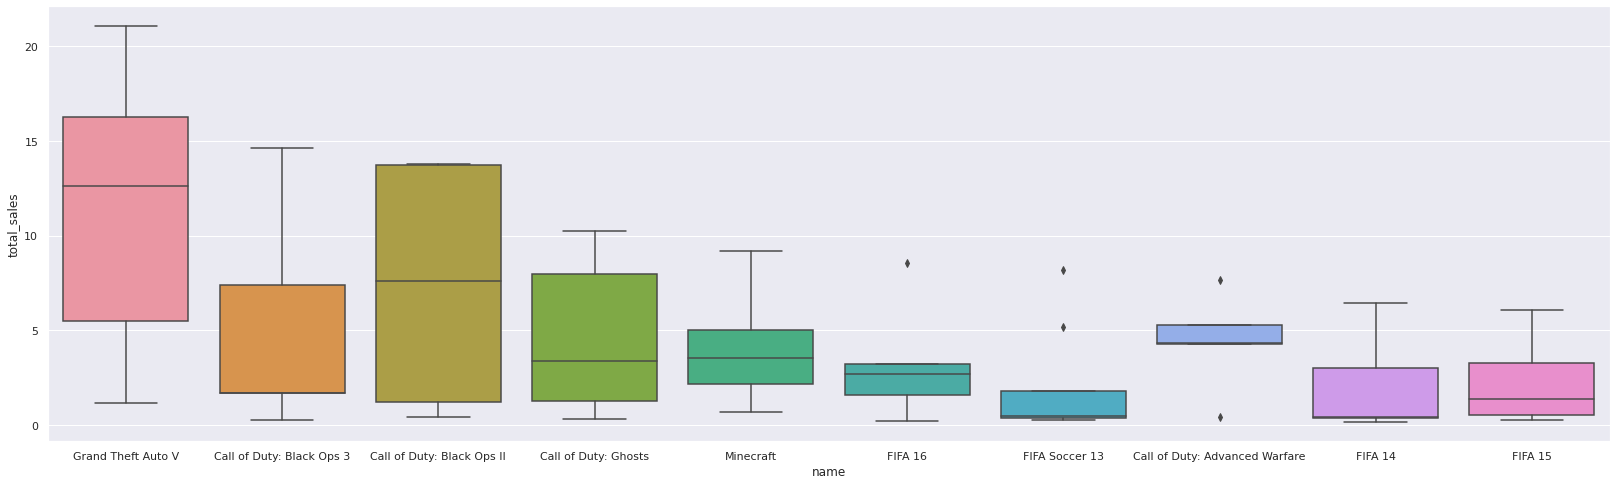

In [29]:
top10_games = games_period.groupby('name')['total_sales'].sum().sort_values(ascending=False)[0:10]
plt.figure(figsize=(28,8))
sb.boxplot(data=games_period.query('name in @top10_games.index'), x='name', y='total_sales')
plt.show()

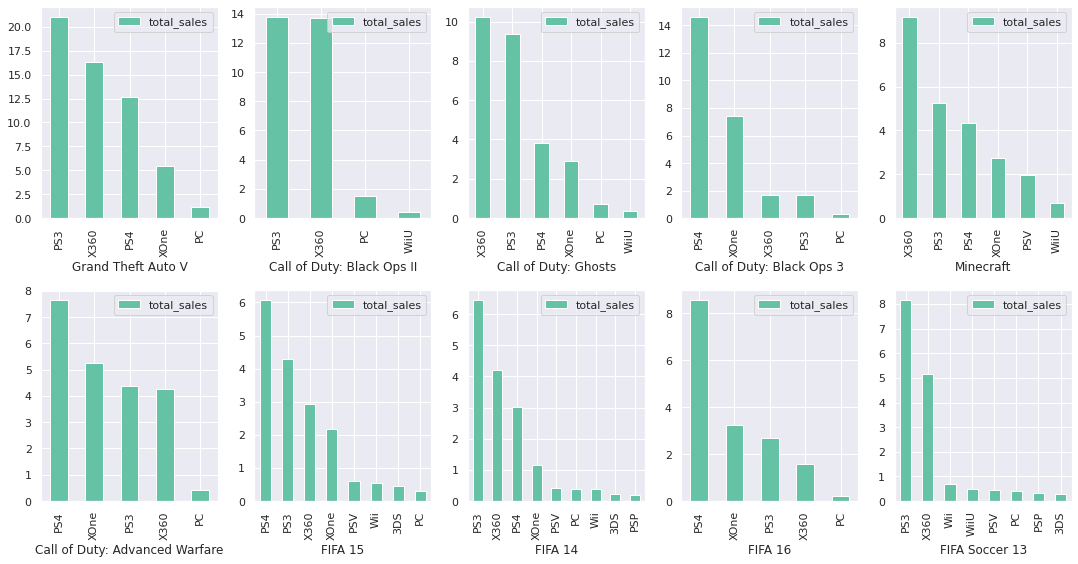

In [30]:
plt.subplots(2,5,figsize=(15,8))
i = 1
for game in top10_games.index:
    ax=plt.subplot(2,5,i)
    games_period.query('name==@game').plot(kind='bar', x='platform', y='total_sales', ax=ax)
    ax.set_xlabel(game)
    i += 1
plt.tight_layout()

Как видно из графиков, самые популярные игры имеют самые высокие продажи для самых популярных платформ PS3, PS4, X360,XOne

Проанализируем продажи по платформам

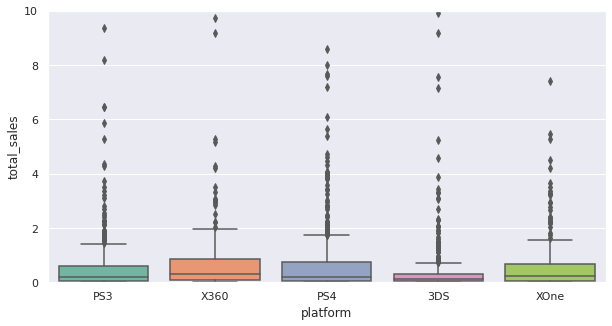

In [31]:
plt.figure(figsize=(10,5))
sb.boxplot(data=games_top5_platforms, x='platform', y='total_sales')
plt.ylim(0,10)
plt.show()

Все патформы выпускают самые продаваемые игры

Рассмотрим как влияют отзывы пользователей и критиков на продажи на одной популярной платформе, для примера возьмем X360

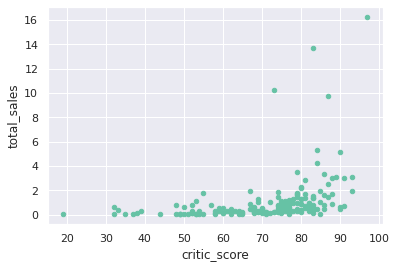

In [32]:
games_period.query('platform=="X360"').plot(kind='scatter', x='critic_score', y='total_sales')
plt.show()

In [33]:
games_period.query('platform=="X360"')['critic_score'].corr(games_period.query('platform=="X360"')['total_sales'])

0.3605734888507336

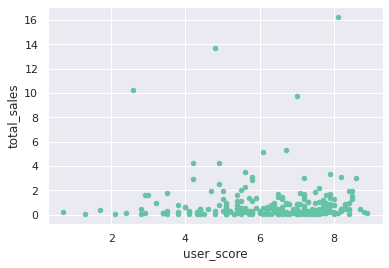

In [34]:
games_period.query('platform=="X360"').plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

In [35]:
games_period.query('platform=="X360"')['user_score'].corr(games_period.query('platform=="X360"')['total_sales'])

0.006163978646213326

На основании данных диаграмм рассеяния и корреляции Пирсона можно сделать вывод, отзывы критиков не занчительно, но влияют на продажи. Тогда как отзывы пользователей практически не оказывают влияниния на продажи

Расчитаем корреляцию для других платформ

На основании оценки критиков

In [36]:
platforms = games_period['platform'].unique()
for platform in platforms:
    temp = games_period.query('platform==@platform')
    print(platform,'коэффициент корреляции:',temp['critic_score'].corr(temp['total_sales']))

PS3 коэффициент корреляции: 0.3314972592629587
X360 коэффициент корреляции: 0.3605734888507336
PS4 коэффициент корреляции: 0.40656790206178095
3DS коэффициент корреляции: 0.3208028695360785
DS коэффициент корреляции: nan
XOne коэффициент корреляции: 0.4169983280084017
WiiU коэффициент корреляции: 0.34837976012017485
Wii коэффициент корреляции: -0.4243413011077494
PC коэффициент корреляции: 0.23724324311567915
PSV коэффициент корреляции: 0.0944878992931617
PSP коэффициент корреляции: nan


На основании оценки пользователей

In [37]:
latforms = games_period['platform'].unique()
for platform in platforms:
    temp = games_period.query('platform==@platform')
    print(platform,'коэффициент корреляции:',temp['user_score'].corr(temp['total_sales']))

PS3 коэффициент корреляции: -0.005143522887113828
X360 коэффициент корреляции: 0.006163978646213326
PS4 коэффициент корреляции: -0.031957110204556376
3DS коэффициент корреляции: 0.19758263411038599
DS коэффициент корреляции: 0.88270872757644
XOne коэффициент корреляции: -0.06892505328279414
WiiU коэффициент корреляции: 0.4002190202148617
Wii коэффициент корреляции: 0.29619680007479526
PC коэффициент корреляции: -0.12186747630735577
PSV коэффициент корреляции: -0.004339437514314869
PSP коэффициент корреляции: -0.802302061939321


Результат подтверждаем ранее сделанные выводы.
Продажи в определенной степени зависят от оценки критиков, особенно ярко это видно на примерере платформ входящих в топ по продажам. 
А оценка пользователей на большенстве платформ не оказывает влияния продажи, но есть исключение как мы видим из полученных данных - это платформы DS, WiiU, Wii. При этом на данных платформах значительно низко влияние отзывов критиков, возможно в этом причина. Покупатели в этом случае опираютмся на отзывы пользователей 

Рассмотрим распределение игр по жанрам

In [38]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

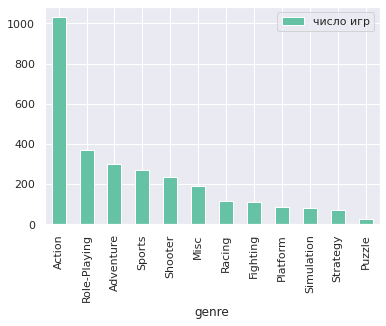

In [39]:
games_period.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', label='число игр', legend=True)
plt.show()

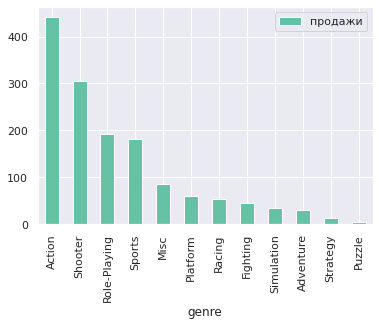

In [40]:
games_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', label='продажи', legend=True)
plt.show()

Как видно из графиков лидер по количеству выпускаемых игр и объему продаж жанр - Action. Так же можно выделить такие жанры как: Adventure - здесь мы видим большое количетво выпускаемых игр, но при этом продажи очень низкие, Shooter - игр выпускают в данном жанре не так много, но при этом они пользуются высоким спросом у пользователей

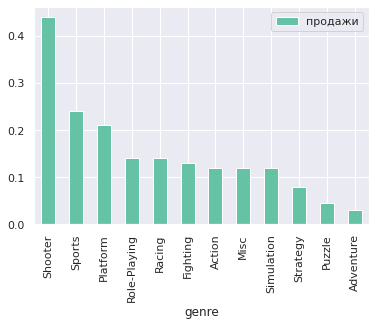

In [41]:
games_period.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', label='продажи', legend=True)
plt.show()

Ответ студента: при анализе продаж с примененим метода медианных продаж, картина меняется. Можно отметить, что наиболее высокий доход приносят игры в жанре "Shooter", при этом колличество выпускаемых игр в данном жанре не высокое. При этом лидер по выпуску игр на рынок жанр "Action" при данном подходе к анализу данных по прибыльности имеет достаточно скромный результат. Видимо небольшое количество коммерчески успешных проектов, перекрывает досточно скромные результаты по остальным позициям из данного жанра

# 4. Портрет пользователя по регионам

Рассмотрим популярность платформ по регионам

<AxesSubplot:xlabel='platform'>

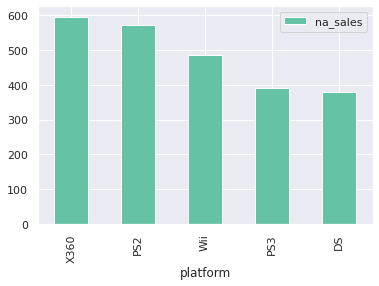

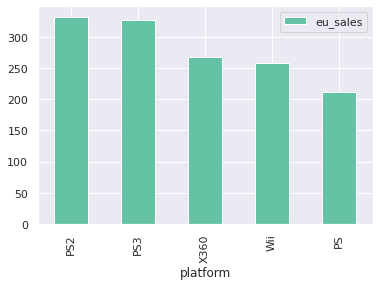

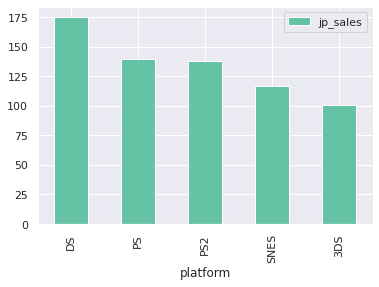

In [42]:
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

Из полученных графиков можно сделать вывод: предпочтения пользователей в Северной Америке и Европе похожи, а вот в Японии большей популярность пользуется платформа DS. 

Рассмотрим популярность жанров по регионам

<AxesSubplot:xlabel='genre'>

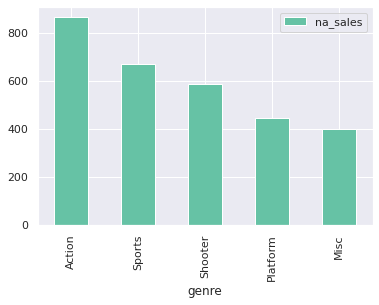

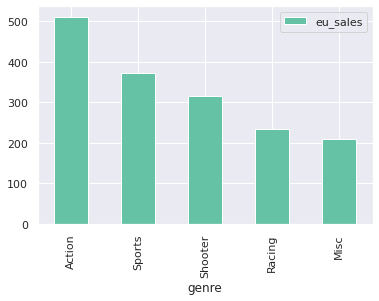

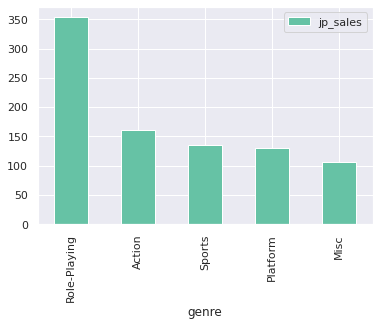

In [43]:
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

Из полученных графиков можно сделать вывод: предпочтения пользователей из Северонй Америки и Европы практически не отличаются, топ-3 по жанрам вообщее идентичны. В Японии большее предпочтение пользователи от дают жанру "Role-Playing". Скорее всего большое влияние оказывает разница культур, если пользователи Северной Америки и Европы в этом плане близки, то рынок в Японии очень спецефичен

Влияние рейтинга ESRB на продажи по регионам

<AxesSubplot:xlabel='rating'>

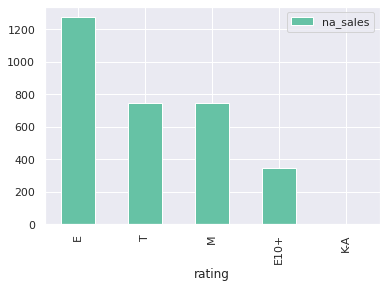

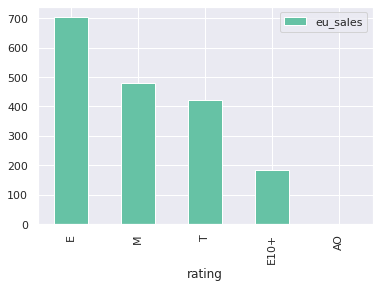

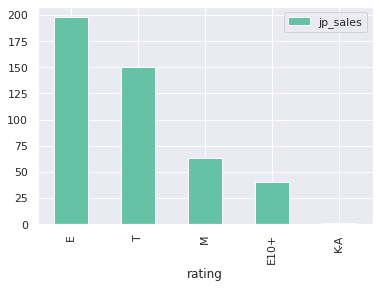

In [50]:
games_with_rating = games.loc[games['rating'] != 'no rating']
games_with_rating.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games_with_rating.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games_with_rating.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

Во все трех регионах сымые популярные игры имеют рейтинг «E» («Everyone») — «Для всех», так же в топ-3 входят игры с рейтинком «M» («Mature») — «Для взрослых» и «T» («Teen») — «Подросткам». При этом в Европе отдают предпочтению играм с рейтингом «T» («Teen») — «Подросткам» больше, чем имеющим рейтинг «M» («Mature») — «Для взрослых»

# 5. Проверка гипотиз

Необходимо проверить гипотизы
- Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- Средний пользовательский рейтинг жанров Action и Sports разный

Нулевая гипотиза всегда формулируется так, чтобы использовать знак равенства.
equal_var берем False так как дисперсии выборок не равны.
Общепринятые пороговые значения — 5% и 1%. Для данной работы берем 5%.

Первая гипотиза

- H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый 
- H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [45]:
alpha = 0.05

XOne = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
PC = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

print(XOne.var(ddof=1))
print(PC.var(ddof=1))
results = st.ttest_ind(XOne, PC, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.9069968429360695
2.349224375076853
p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


Вторая гипотиза

- H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
- H1: средний пользовательский рейтинг жанров Action и Sports различается

In [46]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

print(action.var(ddof=1))
print(sports.var(ddof=1))

results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.027493768262496
2.623055812519272
p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


На основании проверки гипотиз можно сделать выводы: Средний пользовательский рейтинг для платформ "Xbox One" и "PC" отличается, лидер "PC". Средний пользовательский рейтинг по жанрам "Action" и "Sports" практически равен, наблюдается небольшое преимущество "Sports"

# 6. Общий вывод

Проведя анализ данных о продажах компьютерных игр можно дать следующие рекомендации для подготовки рекламной компании на 2017 год:
1. Для анализа целесообразно взять период за последние пять лет 2012-2016
2. Изходя из жанровых предпочтений пользователей на рынках в Европе и Северной Америке больший объем инвестиций в рекламные компании следует направить на продвижение игр в жанре "Action"
3. Но при этом необходимо учесть предпочтения пользователей в выборе платформы в данных регионах, пользователи Европы большее предпочтение отдают "PS3", тогда как в Северной Америке большей полулярностью пользуется "XBox One"
4. Рекламная компания для Японского рынка должна быть принципиально другой, сильное вляние может иметь большое культурное отличие данного региона. Как показал анализ данных в этом регионе пользователи отдают предпочтения играм в жанре "Role-Playing" для платформы "DS"